## Автоперезагрузка пакетов

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sn

Populating the interactive namespace from numpy and matplotlib


In [4]:
train_df = pd.read_csv('trainingData_tabular_chunk1.csv')
test_df = pd.read_csv('trainingData_tabular_chunk2.csv')

In [8]:
record

{'decision': 0,
 'gamestate_id': 2886512,
 'opponent': {'hero': {'armor': 0,
   'attack': 1,
   'hero_card_id': 754,
   'hp': 29,
   'special_skill_used': True,
   'weapon_durability': 2},
  'played_cards': [],
  'stats': {'crystals_all': 7,
   'crystals_current': 0,
   'deck_count': 17,
   'fatigue_damage': 0,
   'hand_count': 6,
   'played_minions_count': 0,
   'spell_dmg_bonus': 0}},
 'player': {'hand': [{'attack': 3,
    'charge': False,
    'crystals_cost': 4,
    'forgetful': False,
    'freezing': False,
    'gamestate_id': 2886512,
    'hero': 494,
    'hp': 5,
    'id': 198,
    'name': "Sen'jin Shieldmasta",
    'poisonous': False,
    'shield': False,
    'stealth': False,
    'taunt': True,
    'turn': 8,
    'type': 'MINION',
    'windfury': False},
   {'crystals_cost': 4,
    'gamestate_id': 2886512,
    'hero': 494,
    'id': 1982,
    'name': 'Fireball',
    'turn': 8,
    'type': 'SPELL'},
   {'attack': 3,
    'charge': False,
    'crystals_cost': 4,
    'forgetful': F

In [14]:
from tqdm import tqdm
import json
df_cards = []
filename = 'trainingData_JSON_chunk1.json'
with open(filename) as fin:
    for record in tqdm(map(json.loads, fin)):
        for card in record.get():
            card['decision'] = record['decision']
            card['gamestate_id'] = record['gamestate_id']
            card['hero'] = record['player']['hero']['hero_card_id']
            df_cards.append(card)
df = pd.DataFrame.from_records(df_cards)

0it [00:00, ?it/s]


TypeError: get expected at least 1 arguments, got 0

In [26]:
pd.options.display.max_columns = None
train_df.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,opponent.crystals_current,opponent.deck_count,opponent.fatigue_damage,opponent.hand_count,opponent.played_minions_count,player.armor,player.attack,player.hero_card_id,player.hp,player.special_skill_used,player.weapon_durability,player.crystals_all,player.crystals_current,player.deck_count,player.fatigue_damage,player.hand_count,player.played_minions_count,opponent.played.nOfCards,opponent.played.attack,opponent.played.crystals_cost,opponent.played.hp_current,opponent.played.hp_max,player.played.nOfCards,player.played.attack,player.played.crystals_cost,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp,opponent.hp.armor,player.hp.armor,diff.hp.armor,opponent.hero_card_id_25,opponent.hero_card_id_326,opponent.hero_card_id_390,opponent.hero_card_id_494,opponent.hero_card_id_612,opponent.hero_card_id_754,opponent.hero_card_id_798,opponent.hero_card_id_981,opponent.hero_card_id_1235
349831,4557330,1,10,0,0,326,21,1,0,9,5,17,0,5,2,0,0,612,29,0,0,9,0,16,0,4,2,2,8,7,4,7,2,13,13,12,14,3,1,0,4,0,20,23,21,21,29,8,0,1,0,0,0,0,0,0,0
228253,4554524,1,8,0,0,494,19,0,0,7,1,17,0,6,0,0,3,754,24,0,4,8,3,16,0,6,2,0,0,0,0,0,2,4,4,2,5,4,2,0,6,3,16,20,19,19,24,5,0,0,0,1,0,0,0,0,0
473599,1527999,1,15,0,0,798,4,0,0,10,7,11,0,2,0,0,0,25,16,0,0,10,9,12,0,3,6,0,0,0,0,0,6,13,15,14,18,3,0,0,3,3,7,11,12,4,16,12,0,0,0,0,0,0,1,0,0
454497,2388252,0,8,0,0,612,21,0,0,8,2,18,0,8,2,0,0,798,29,1,0,8,1,18,0,3,1,2,7,8,7,11,1,3,3,6,6,2,1,0,3,0,7,12,7,21,29,8,0,0,0,0,1,0,0,0,0
146698,1731280,1,11,0,0,494,8,0,0,10,6,16,0,2,1,0,0,494,9,1,0,10,6,16,0,2,3,1,6,6,1,7,3,7,6,9,9,1,1,0,2,2,4,7,5,8,9,1,0,0,0,1,0,0,0,0,0


In [7]:
df

,attack,charge,crystals_cost,durability,forgetful,freeze,freezing,gamestate_id,hero,hp,id,name,poisonous,shield,stealth,taunt,turn,type,windfury
0,5.0,False,7,NaN,False,NaN,False,4687346,981,6.0,2137,Guardian of Kings,False,False,False,False,14,MINION,False
1,2.0,False,2,NaN,False,NaN,False,4687346,981,1.0,1902,Murloc Tidehunter,False,False,False,False,14,MINION,False
2,4.0,NaN,4,2.0,False,False,NaN,4687346,981,NaN,172,Truesilver Champion,NaN,NaN,NaN,NaN,14,WEAPON,NaN
3,3.0,False,2,NaN,False,NaN,False,4687346,981,2.0,1155,Acidic Swamp Ooze,False,False,False,False,14,MINION,False
4,6.0,False,7,NaN,False,NaN,False,4687346,981,6.0,300,Stormwind Champion,False,False,False,False,14,MINION,False
5,4.0,False,4,NaN,False,NaN,False,3270826,754,5.0,1321,Chillwind Yeti,False,False,False,False,7,MINION,False
6,3.0,NaN,5,4.0,False,False,NaN,3270826,754,NaN,1811,Assassin's Blade,NaN,NaN,NaN,NaN,7,WEAPON,NaN
7,3.0,False,2,NaN,False,NaN,False,3270826,754,2.0,1155,Acidic Swamp Ooze,False,False,False,False,7,MINION,False
8,3.0,NaN,5,4.0,False,False,NaN,3270826,754,NaN,1811,Assassin's Blade,NaN,NaN,NaN,NaN,7,WEAPON,NaN
9,4.0,False,4,NaN,False,NaN,False,3270826,754,5.0,1321,Chillwind Yeti,False,False,False,False,7,MINION,False


In [33]:
df_cards[5]

{'attack': 4,
 'charge': False,
 'crystals_cost': 4,
 'forgetful': False,
 'freezing': False,
 'gamestate_id': 3270826,
 'hero': 754,
 'hp': 5,
 'id': 1321,
 'name': 'Chillwind Yeti',
 'poisonous': False,
 'shield': False,
 'stealth': False,
 'taunt': False,
 'turn': 7,
 'type': 'MINION',
 'windfury': False}

In [36]:
df_records[5]

NameError: name 'df_records' is not defined

In [14]:
# feature ingeneering
train_df['opponent.hp.armor'] = train_df['opponent.hp'] + train_df['opponent.armor']
train_df['player.hp.armor'] = train_df['player.hp'] + train_df['player.armor']
train_df['diff.hp.armor'] = train_df['player.hp.armor'] - train_df['opponent.hp.armor']   

In [15]:
train_df['opponent.hero_card_id'].value_counts()

798     67578
494     63623
25      62067
1235    60777
612     53141
981     51628
326     50802
754     46006
390     44378
Name: opponent.hero_card_id, dtype: int64

In [16]:
# one-hot encoding
def ohe_column(df, column):
    df_ohe = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, df_ohe], axis=1)
    return df
train_df = ohe_column(train_df, 'opponent.hero_card_id')

# Подготовка к кросс-валидации

In [17]:
train_df = train_df.sample(10000)

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold

data_folds, data_holdout = train_test_split(train_df, random_state=177, 
                                            test_size=0.2, stratify=train_df.decision)

skf = list(StratifiedKFold(n_splits=5, shuffle=True, 
                           random_state=177).split(data_folds.drop('decision',1), data_folds.decision))

/Users/a1/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=7, n_jobs=12)
kn.fit(data_folds.drop('decision',1), data_folds.decision)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=12, n_neighbors=7, p=2,
           weights='uniform')

In [21]:
kn.predict_proba(data_holdout.drop('decision', 1))

array([[ 0.28571429,  0.71428571],
       [ 0.57142857,  0.42857143],
       [ 0.57142857,  0.42857143],
       ..., 
       [ 0.14285714,  0.85714286],
       [ 0.57142857,  0.42857143],
       [ 0.14285714,  0.85714286]])

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import grid_search

method = DecisionTreeClassifier()

parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20,50],
              "max_depth": [None, 2, 5, 10,30],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20,50],
              }

clf = grid_search.GridSearchCV(method, parameters, cv=skf,scoring='roc_auc', verbose=3)
clf.fit(data_folds.drop('decision',1), data_folds.decision)

/Users/a1/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.623209 -   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.606034 -   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.624406 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.611938 -   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.614134 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.651321 -   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.634006 -   0.2s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, sc

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.696656 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.708510 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.703845 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.688785 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=1

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.710278 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.699200 -   0.0s
[CV] crite

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.726974 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.717076 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.745700 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.733160 -   0.1s
[

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.734818 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.726974 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.717076 -   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.745700 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.733160 - 

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50, score=0.742440 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50, score=0.749313 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.746896 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.733331 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.752494 -   0.1s

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50, score=0.752494 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50, score=0.742319 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50, score=0.749313 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.747533 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.728898 -

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50, score=0.748209 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50, score=0.739503 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50, score=0.748203 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50, score=0.734009 -   0.1s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=50, score=0.726748 - 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.694269 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.687412 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.686766 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.684982 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.704855 -   0.0s
[C

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.694269 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.687412 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.686766 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.684982 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.704855 - 

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.710278 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.699200 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.717530 -   0.0s
[CV] criterion=gini, max_dept

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50, score=0.711240 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50, score=0.716797 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50, score=0.713163 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50, score=0.725867 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.718051 -   0.0s
[CV] criterion=gini, m

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50, score=0.711240 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50, score=0.716797 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50, score=0.713163 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=50, score=0.725867 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.718051 -   0.0s
[CV] criterion=gini,

[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=50, score=0.713163 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=50, score=0.725867 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.718051 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.711240 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.711240 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.716797 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.713163 -   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.725867 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.742375 -   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.739925 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.759549 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.741301 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.744461 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.741178 -   0.1s
[C

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.710278 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.699200 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=5,

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.699200 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.726974 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.717076 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.745700 -   0.0s
[CV] criterion=gini, max_d

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.717076 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.745700 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.733160 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.734818 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.726974 -   0.0s
[CV] criterion=gin

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.753065 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.742319 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.749313 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.746896 -   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.733331 -   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.759899 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.745895 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.735892 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.749941 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.730051 -   0.1s
[CV] criterion=gini, max_

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.759617 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.748267 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.731057 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.742503 -   0.1s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.732605 -   0.1s
[CV] criterion=g

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.718204 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.706992 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.696930 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.708668 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.703660 -   0.1

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.699200 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.710278 -   0.0s
[CV] criterion=gini, ma

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.710278 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.699200 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.717530 -   0.0s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.745700 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.733160 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.734818 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.726974 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.717076 -   0.0s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.733331 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.752494 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.742440 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.749313 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.746896 -   0.0s
[CV] criter

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.752494 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.742440 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.749313 -   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.746896 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.733331 -   0.0s
[C

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, score=0.750809 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, score=0.735531 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, score=0.730600 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.744240 -   0.1s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.731815 -   0.1s
[CV] criter

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.643496 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.639566 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.660890 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.648189 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.647388 - 

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.696753 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, score=0.689752 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.689957 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.695361 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.709

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.717530 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.709524 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.708754 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.710278 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.699200 -   0.0s
[CV] criterion=gini, 

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.726974 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.717076 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.745700 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.733160 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.734818 -   0.0s
[CV] criter

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=2, score=0.734818 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.726974 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.717076 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.745700 -   0.0s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.733160 -   0.0s
[CV

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.742440 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, score=0.749313 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.746896 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.733331 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, score=0.752494 -   0.1s
[CV] criterion

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.730353 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=2, score=0.729934 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.745334 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.728898 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.750907 -   0.1s
[CV] criterion

[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.730135 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.749342 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.736790 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=2, score=0.722181 -   0.1s
[CV] criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=30, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.747267 -   0.1s
[CV] crit

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=50, score=0.696455 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.704901 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.681048 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, score=0.673277 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, m

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.738266 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.708102 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.719476 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50, score=0.721260 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_sa

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.698545 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=50,

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.726398 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.728871 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.734393 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.735565 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_

[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.728871 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.734393 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.735565 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=50, score=0.735321 -   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=10, min_

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.730823 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.742915 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.737316 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.747596 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.736723 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20, score=0.760914 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=1, min_samples_

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.754558 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.737219 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.741098 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.744240 -   0.1s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=50, min_samples_leaf=10, min

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.675359 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.679475 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.677518 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.704855 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20,

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=2, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.698545 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.708275 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.703209 -   0.0s
[CV

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.708275 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, score=0.698545 - 

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.709336 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.725176 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.716784 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.709748 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, score=0.711462 - 

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.711462 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.709336 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.725176 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.716784 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.709748 - 

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.711462 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.709336 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, score=0.725176 -   0.1s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.716784 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, score=0.709336 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=10, score=0.725176 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.716784 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.709748 -   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.711462 - 

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.744872 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.741675 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, score=0.750989 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, score=0.753912 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20,

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.748993 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.741461 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, score=0.747814 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, score=0.752267 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, score=0.698545 -   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=20, score=0.708275 -   0.0s
[C

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, score=0.735565 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.735321 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.726398 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.728871 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, score=0.734393 - 

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=10, score=0.735565 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.735321 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.726398 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.728871 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, score=0.

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.730823 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.742915 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, score=0.747796 - 

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=10, score=0.735559 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20, score=0.751502 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20, score=0.741997 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20, score=0.743248 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=20, score=0.745686 - 

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, score=0.736758 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20, score=0.747824 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20, score=0.740792 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20, score=0.740727 -   0.1s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=20, score=0.

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.715706 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.718398 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=10, score=0.705536 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20, score=0.742676 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=None, min_samples_leaf=5, min_samples_

[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.698545 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.708275 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=en

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.703209 -   0.2s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, score=0.710112 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.698545 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.701131 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, score=0.708

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.734393 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, score=0.735565 -   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.735321 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.726398 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, score=0.728

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, score=0.747796 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.730823 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, score=0.742

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.730823 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.742915 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, score=0.

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=1, min_samples_split=50, score=0.737776 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.760515 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.738142 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.737556 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=2, score=0.747596 -

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.744630 -   0.1s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=50, score=0.734800 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.651517 -   0.2s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, score=0.634756 -   0.2s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.722151 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.713684 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.701677 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=50, score=0.722982 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=None, min_samples_leaf=10, min_samples

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.708275 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=50, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, score=0.698545 -   

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.701131 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.708275 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.703209 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=50, score=0.710112 -   0.0s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=2, score=0.73

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.735321 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.726398 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.728871 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.734393 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=50, score=0.

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.742915 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, score=0.747796 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=50, score=0.

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.742915 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.750789 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, score=0.747796 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50, score=0.751991 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=50,

[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.760515 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.738142 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.737095 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.747596 -   0.1s
[CV] criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=entropy, max_depth=30, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=20, score=0.

[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:  3.0min finished


GridSearchCV(cv=[(array([   0,    1, ..., 7998, 7999]), array([   7,   11, ..., 7984, 7995])), (array([   0,    2, ..., 7995, 7996]), array([   1,    4, ..., 7998, 7999])), (array([   1,    4, ..., 7998, 7999]), array([   0,    2, ..., 7977, 7994])), (array([   0,    1, ..., 7998, 7999]), array([   5,   10, ..., 7993, 7996])), (array([   0,    1, ..., 7998, 7999]), array([  25,   27, ..., 7972, 7980]))],
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50], 'max_depth': [None, 2, 5, 10, 30], 'min_samples_leaf': [1, 5, 1

### roc auc

https://en.wikipedia.org/wiki/Sensitivity_and_specificity
    
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### sklearn

http://scikit-learn.org/stable/

https://www.oreilly.com/ideas/intro-to-scikit-learn

In [23]:
best_est = clf.best_estimator_

# Исследование

pandas:

    .value_counts()
    .describe()
    .nunique()
matplotlib

https://pandas.pydata.org/pandas-docs/stable/visualization.html

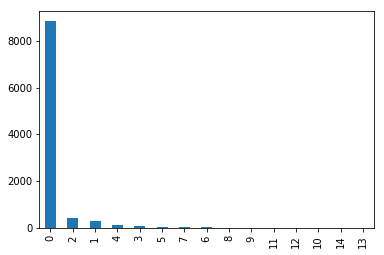

In [24]:
vc_hp = train_df['player.armor'].value_counts()
vc_hp.plot.bar()